In [72]:
import numpy as np
import matplotlib.pyplot

min_age = 1
max_age = 90
# importing the training data
encodings = []
ages_distr = []
for i in range(min_age, max_age+1):
    enc = np.load(f'bigdata/encodings/train/X{i}.npy')
    ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    encodings.append(enc_i)
encodings = np.concatenate(encodings)                                  # matrix with ages column  

# importing the testing data
test_encodings = []
test_ages_distr = []
for i in range(min_age, max_age+1):
    enc = np.load(f'bigdata/encodings/test/X{i}.npy')
    test_ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    test_encodings.append(enc_i)
test_encodings = np.concatenate(test_encodings)                                  # matrix with ages column  

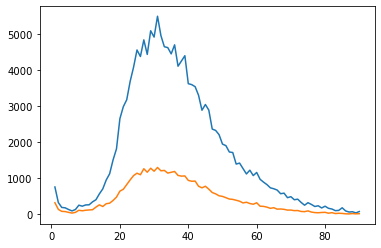

In [73]:
#age distribution
matplotlib.pyplot.plot(range(min_age,max_age+1),ages_distr)
#age distribution of testing data
matplotlib.pyplot.plot(range(min_age,max_age+1),test_ages_distr)

In [74]:
#separating the data
X = encodings[:,:-1]           # matrix without ages column
Y = encodings[:,-1]            # ages only

#separating the test data
X_test = test_encodings[:,:-1]           # matrix without ages column
Y_test = test_encodings[:,-1]            # ages only

In [75]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
np.save("StupidLRcoef", reg.coef_)
np.save("StupidLRintercept", reg.intercept_)



#MSE
np.sqrt(np.sum(np.power(reg.predict(X_test) - Y_test,2))/Y_test.shape[0])

9.809812838175954

In [76]:
Err = []
for i in range(min_age,max_age+1):
    err = np.sqrt(np.sum(np.power(reg.predict(X_test[Y_test == i]) - Y_test[Y_test == i],2))/Y_test[Y_test == i].shape[0])
    Err.append(err)
Err = np.array(Err)

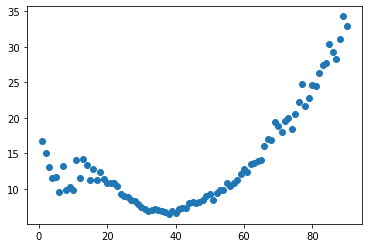

In [77]:
matplotlib.pyplot.plot(range(min_age,max_age+1),Err,'o')

In [78]:
predicts = reg.predict(X_test)

In [79]:
np.mean((predicts))

36.57957074128853

In [80]:
np.std(predicts)

10.738903105547953

In [81]:
sum(np.abs(predicts-40)<=.5)

1315

In [82]:
sum(Y_test==40)

942

In [83]:
means = np.zeros(max_age-min_age+1,dtype=np.float)
stds = np.zeros(max_age-min_age+1,dtype=np.float)
for age in range(min_age,max_age+1):
    pit = Y_test[np.abs(predicts-age) <=.5]
    means[age-min_age] = np.mean(pit)
    stds[age-min_age] = np.std(pit)

C:\Users\sulta\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sulta\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sulta\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sulta\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\sulta\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


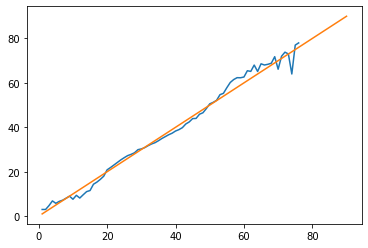

In [84]:
matplotlib.pyplot.plot(range(min_age,max_age+1),means)
matplotlib.pyplot.plot(range(min_age,max_age+1),range(min_age,max_age+1))

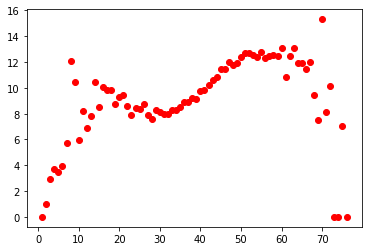

In [85]:
matplotlib.pyplot.plot(range(min_age,max_age+1),stds, "ro")